## **Problem Statement**

### **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


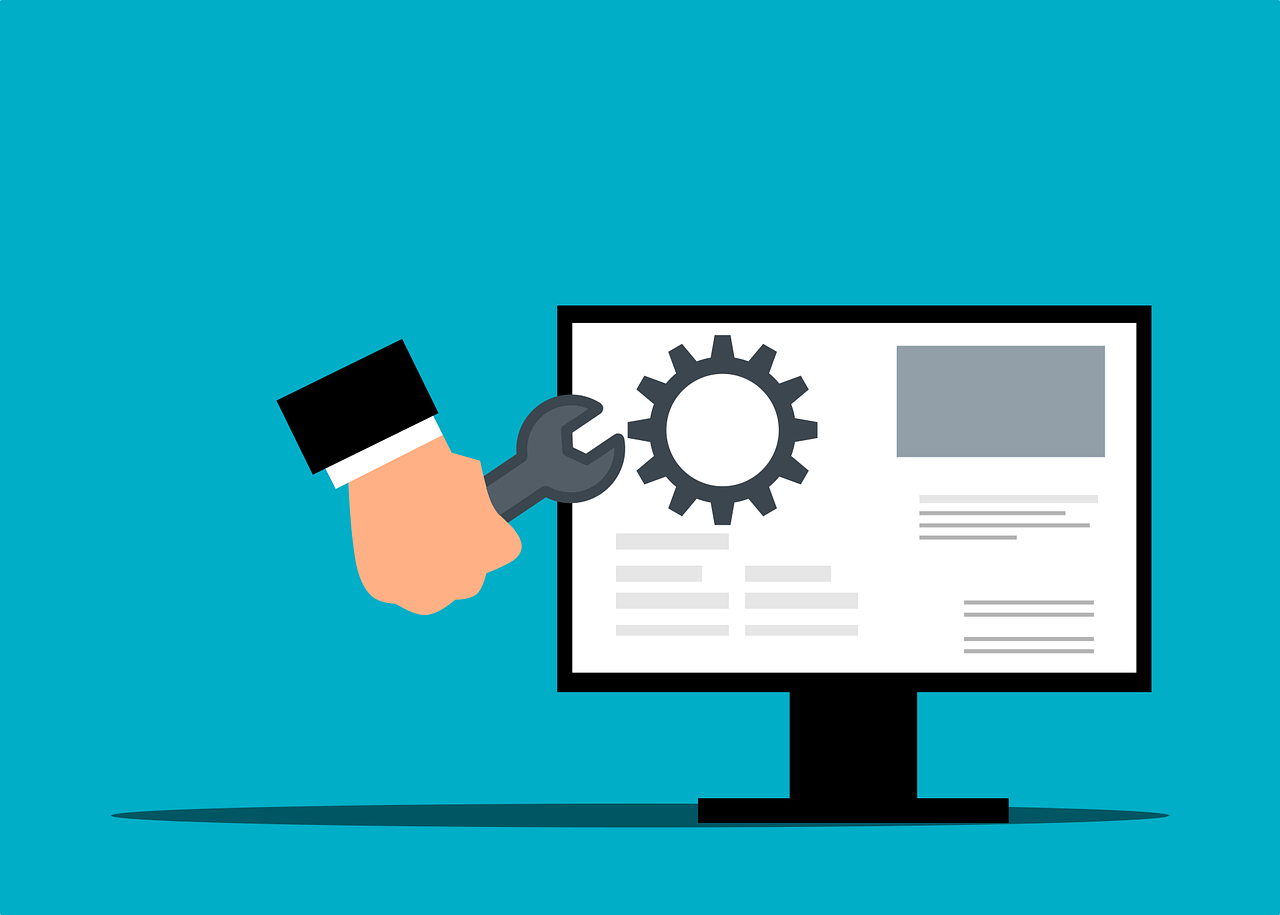

### **Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


## **Sample of Expected Output**

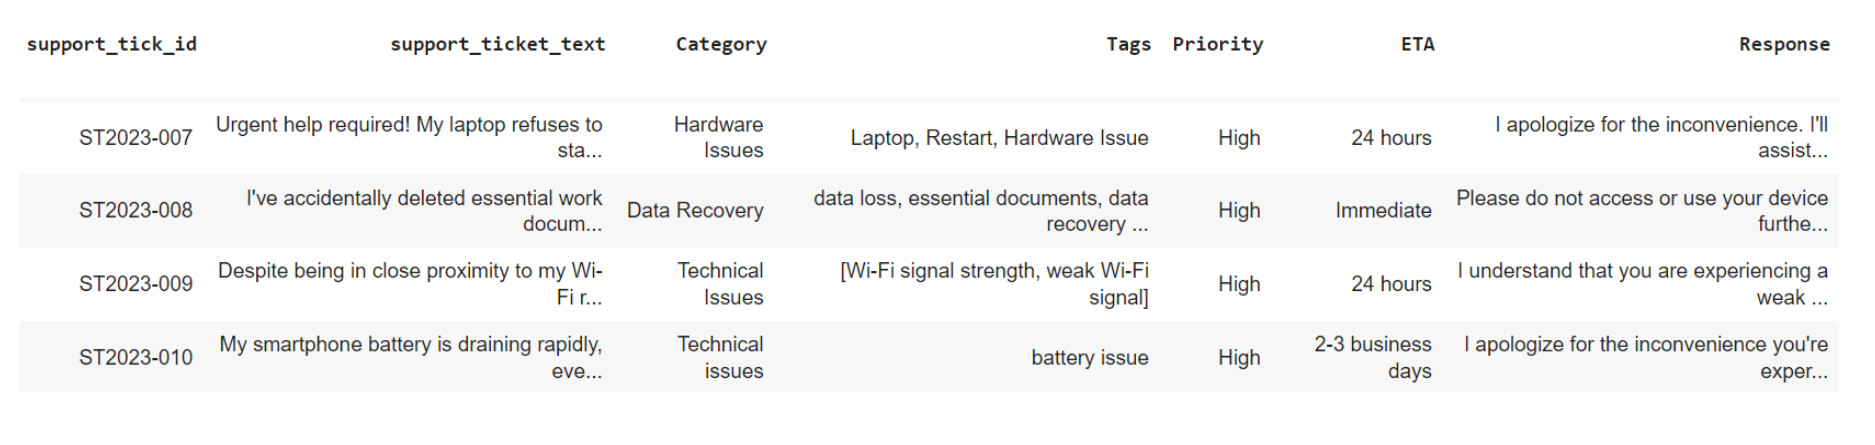

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


## **Installing and Importing Necessary Libraries and Dependencies**

In [1]:
# Installation for GPU llama-cpp-python
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 46.9 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-ct692xn5
  Entered build tracker: /tmp/pip-build-tracker-ct692xn5
  Created temporary directory: /tmp/pip-install-qbc8ooup
  Created temporary directory: /tmp/pip-ephem-wheel-cache-r1tyhkf0
  1 location(s) to search for versions of scikit-build-core:
  * https://pypi.org/simple/scikit-build-core/
  Fetching project page and analyzing links: https://pypi.org/simple/scikit-build-core/
  Getting page https://pypi.org/simple/scikit-build-core/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/scikit-build-core/" in the cache
  Request header has "max_age" as 0, cache bypassed

In [2]:
# For downloading the models from HF Hub
#!pip install huggingface_hub==0.20.3 -q
!pip install huggingface-hub

In [3]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

## **Loading the Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Complete the code to read the CSV file
data = pd.read_csv('/content/drive/MyDrive/Python Course/Support_ticket_text_data_mid_term.csv')

## **Data Overview**

In [6]:
# Write the code to check the first 5 rows of the data
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [7]:
# Write the code to check the shape of the data
data.shape

(21, 2)

In [8]:
# Write the code to check for missing values in the data
data.isna().sum()

,0
support_tick_id,0
support_ticket_text,0


## **Model Building**

### Loading the model

In [10]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q6_K.gguf" # the model is in gguf format

In [11]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q6_K.gguf:   0%|          | 0.00/10.7G [00:00<?, ?B/s]

In [12]:
# complete the code to create an instance of the 'Llama' class with specified parameters


lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Defining Model Response Parameters

In [13]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0.01,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

In [14]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0.01,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

## **Task 1: Ticket Categorization**

In [15]:
# create a copy of the data
data_1 = data.copy()

In [16]:
## Complete the prompt to get the desired output
instruction_1 = """
    You are acting as a guide for a technical assistant. As a technical assistant, your primary task is to classify the support ticket into specific
    categories. There are three categories:Technical Issues, Hardware Issues, and Data Recovery.

    As a technical assistant, you should only respond with one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable.

    Your goal is to identify the category and then provide the following information from the support ticket text, including the creating tags, assigning priority, suggested ETA,
    generating 1st reply based on sentiment. Go through the each support ticket text thoroughly and considering the overall sentiment before responding, and generate only a structured output for
    the JSON format.
    Here is the structured output for further analysis in JSON format. Follow the JSON format below strictly.You must include the following as JSON output:


    {"category": <create one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable>,
     "tags": <create tags to further classify the ticket>,
     "priority": <assign a priority level (e.g., "High" or "Normal") only based on the understanding of the text>,
     "suggested_ETA": <provide an estimated time for resolving the issue mentioned in the ticket>,
     "generated_1st_reply": <generate a 50 words only reply that aligns with the sentiment expressed in the ticket.The tone of all responses should be polite and professional.>
     }

     Here is an example:

     support_ticket_text: My internet connection is very slow for the last 3 days. Therefore, it is hard for me to work efficiently from home.
     I am also facing frequent disconnections. Can you please help me to resolve this issue promptly.

     Your output should be:

     {"category": "Technical Issues",
      "tags": ["connectivity", "slow internet"],
      "priority": "High",
      "suggested_ETA": "ASAP",
      "generated_1st_reply": "We are sorry to hear the slow internet connectivity issues. Our team will work promptly to resolve this issue and get your connection back up to speed."
      }
    """

In [ ]:
data_1['llama_response'] = data_1['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_1,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_1.head(50)

In [ ]:
data_1['llama_response'].dtypes

In [ ]:
data_1['support_ticket_text'][16]

In [ ]:
print(data_1['llama_response'][16])

#data_1['llama_response'][3]

In [ ]:
print(len(data_1['llama_response']))

In [ ]:
#Trimming texts from the first llama_response, keeping only the JSON response
import re
updated_response= re.findall(r'\{([^}]*)\}', data_1['llama_response'][16])
print(updated_response)

In [ ]:
def extract_category(model_response):
    if 'technical issues' in model_response.lower():
        return 'Technical issues'
    elif 'hardware issues' in model_response.lower():
        return 'Hardware issues'
    elif 'data recovery' in model_response.lower():
        return 'Data recovery'

In [ ]:
data_1['Category'] = data_1['llama_response'].apply(extract_category)
data_1['Category'].head(25)

In [ ]:
data_1 = data_1.dropna(how='any', axis=0)

In [ ]:
print(len(data_1['llama_response']))

In [ ]:
data_2=data_1.copy()

In [ ]:
# Deleting non json response row
data_2 = data_2[data_2['llama_response'].apply(lambda x: '{' in x)]

In [ ]:
data_2.reset_index(drop=True, inplace=True)

In [ ]:
data_2.head(25)

In [ ]:
print(len(data_2['llama_response']))

In [ ]:
#Trimming texts from the llama_response, keeping only the JSON response
import re
for i in range(0,20):
  data_2['llama_response'][i] = re.findall(r'\{([^}]*)\}', data_2['llama_response'][i])[0]
  data_2['llama_response'][i] = f"{{{data_2['llama_response'][i]}}}"
  print (i)
  print(data_2['llama_response'][i])

In [ ]:
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

# Apply the function to the 'llama_response' column
data_2['llama_response_parsed'] = data_2['llama_response'].apply(extract_json_data)

In [ ]:
final_data = data_2.drop(['Category'], axis=1)
final_data.head(25)

In [ ]:
final_data['llama_response_parsed'][0]

In [ ]:
#  converting parsed json response to columns category, priority, ETA and 1st response
final_data = pd.concat([final_data, pd.json_normalize(final_data['llama_response_parsed'])], axis=1)

In [ ]:
final_data

In [ ]:
# Drop specific columns which are not needed from the DataFrame 'data'
# Keep the columns which are mentioned in the sample output
del final_data['llama_response']

In [ ]:
del final_data['llama_response_parsed']

In [ ]:
final_data.head()

## **Model Output Analysis**

In [ ]:
final_data['category'].value_counts()   # complete the code to check the distribution of categories

In [ ]:
final_data['priority'].value_counts()   # complete the code to check the distribution of priority

In [ ]:
final_data['suggested_ETA'].value_counts()   # complete the code to check the distribution of ETA

In [ ]:
final_data.groupby(['priority', 'category']).support_tick_id.count()   # complete the code to check the distribution of priority by categories

In [46]:
final_data.groupby(['suggested_ETA', 'category']).support_tick_id.count()   # complete the code to check the distribution of ETA by categories

suggested_ETA    category        
24 hours         Technical Issues    1
ASAP             Data Recovery       5
                 Hardware Issues     5
                 Technical Issues    7
Within 24 hours  Hardware Issues     2
Name: support_tick_id, dtype: int64

**Observations**

* The aim of this project is to create a Generative AI application that can automate the processing and classification of support tickets using a Large Language Model. To achieve this, I have utilized Llama 2, which is a pre-trained and fine-tuned generative text model ranging from 7 billion to 70 billion parameters. Specifically, I have used the 13B fine-tuned model (llama-2-13b-chat.Q6_K.gguf, which is a 6-bit quantized version model) that is optimized for dialogue use cases, and I have converted it to the Hugging Face Transformers format.

* To create a prompt for the technical assistant, I merged the support ticket text from the input CSV file with a system message. The system message contains detailed instructions and guidelines to help the technical assistant classify the support ticket text, generate tags, assign priority, suggest the expected time of arrival (ETA), and create a sentiment-based response in JSON format. The system message also includes a one-shot example to guide the technical assistant.

* Next, a response text from the LLaMA model was generated using the lcpp_llm instance with the following parameters: max_tokens = 256, temperature = 0, top_p = 0.95, repeat_penalty = 1.2, top_k = 50, and echo = False.

* The generated LLaMA response includes some additional text before the JSON format response for each ticket. Therefore, text trimming was performed from the generated LLaMA response to keep only the JSON response.

* Next, I parsed the JSON data, extracted key-value pairs, and normalized and concatenated them (setting axis = 1) in the 'data' DataFrame to add the JSON response as 5 new columns (category, tags, priority, suggested ETA, and generated 1st response) in the 'data' DataFrame for better visualization.

* I had to delete one row as despite many tries and different model base one of the response was not in JSON format.

* All the tickets were pretty much evenly distributed for various category
 -  Technical Issues    8
 -  Hardware Issues     7
 -  Data Recovery       5

* Most tickets were High priority indicating better need for quality and response

* Most tickets need ASAP resolution , indicating more need for high skilled support

*


## **Actionable Insights and Recommendations**

* The objective of the application is to simplify the management of support tickets by incorporating advanced tools that automate the classification and processing of incoming tickets. The Llama 2 application model uses generative capabilities to process support tickets efficiently and effectively, which reduces response time and minimizes error rates. Overall, this project is a significant step forward in supporting ticket management, leveraging state-of-the-art AI technologies to enhance a crucial business function.

* To enhance the performance of the LLM models and adapt their outputs to the specific business requirements, fine-tuning the prompt with a few shot examples can be very helpful. Additionally, tweaking the parameters of the prompt, such as Temperature, Top K, Frequency Penalty, etc., is another way to modify the LLM's outputs according to the specific business needs.

* All the tickets were pretty much evenly distributed for various category

  - Technical Issues 8
  - Hardware Issues 7
  - Data Recovery 5

* Most tickets were High priority indicating better need for quality and response

* Most tickets need ASAP resolution , indicating more need for high skilled support

-




---

